In [3]:
!pip install imageio

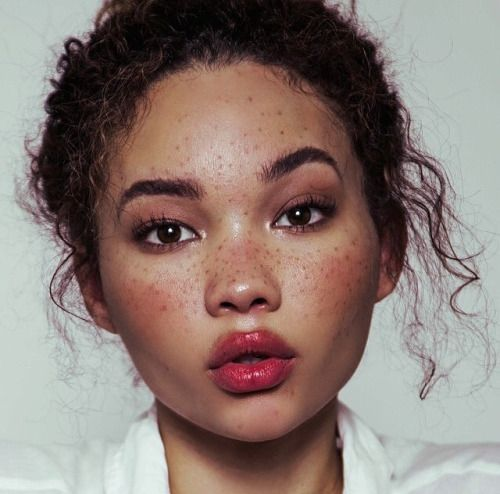

In [4]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

# Display the image from the web using a URI
img = "https://i.pinimg.com/1200x/d2/56/57/d25657a70d1cb2368d2f309fc8b9a8fb.jpg"
dp.Image(requests.get(img).content)

In [5]:
# Read the image using imageio package's imread method and URI from web
source_img = imageio.imread(img)

<ipython-input-5-7e1643685125>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


In [6]:
# Make the image Black and White using the formula
# Y = 0.299 * R + 0.587 * G + 0.114 * B, ie --> applying grayscale
import numpy as np

def grayscaleimg(rgb):
  return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

gyscl_img = grayscaleimg(source_img)

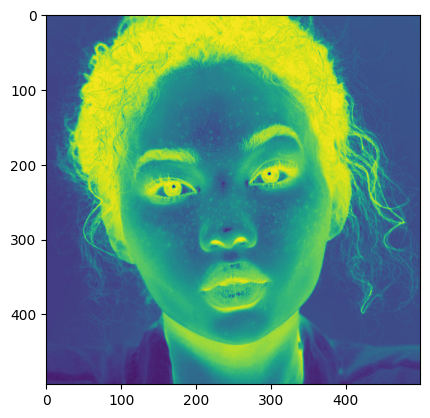

In [7]:
# Invert the image by subtracting it from 255
inv_img = (255 - gyscl_img)
plt.imshow(inv_img)

<ipython-input-8-24d0cb29e01e>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


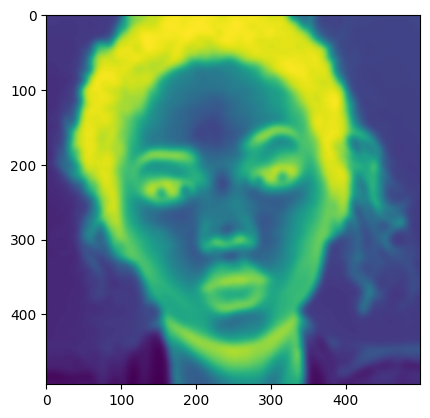

In [8]:
# Blulr the image using Gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)

plt.imshow(blurred_img)

In [9]:
# Create function to perform dodging (blending together greyscale and blurred image)
def dodging(blur_img, gyscl_img):
  resultant_dodge = blur_img * 255 / (255 - gyscl_img)
  resultant_dodge[resultant_dodge > 255] = 255
  resultant_dodge[gyscl_img == 255] = 255

  return resultant_dodge.astype('uint8')

In [10]:
# Generate the target image by applying the dodge
target_img = dodging(blurred_img, gyscl_img)

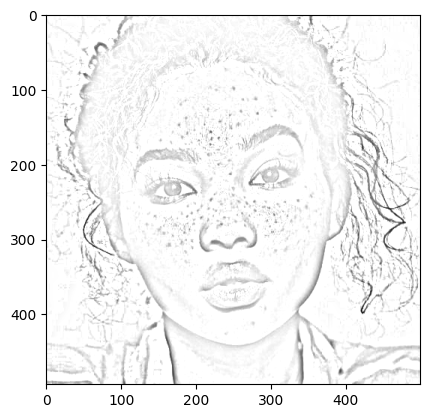

In [11]:
from requests.exceptions import InvalidJSONError
# Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [12]:
from pathlib import Path
import os

# Get the current working directory
current_directory = Path.cwd()
save_dir = current_directory / "saved images"

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.imsave(os.path.join(save_dir, 'target_image.png'), target_img, cmap='gray', vmin=0, vmax=255)